# Basic data analysis

This notebook is mainly a playground / ad-hoc analysis of already labeled data.

In [1]:
from pathlib import Path
import pandas as pd
import plotly.io as pio

pio.renderers.default = "vscode"

In [2]:
base_data_path = Path('../data')
annotations_path = base_data_path / 'annotation_per_row_data.csv'
audio_data_path = base_data_path / 'audio'

list(audio_data_path.glob('*.wav'))

[PosixPath('../data/audio/recording_2024-10-30_19-34.wav'),
 PosixPath('../data/audio/background_1.wav'),
 PosixPath('../data/audio/recording_2024-10-26_20-52.wav'),
 PosixPath('../data/audio/recording_2024-11-02_14-00.wav'),
 PosixPath('../data/audio/recording_2024-10-26_19-46.wav'),
 PosixPath('../data/audio/recording_2024-11-02_13-40.wav'),
 PosixPath('../data/audio/background_7.wav'),
 PosixPath('../data/audio/background_4.wav'),
 PosixPath('../data/audio/record-24-10-02-19-31.wav'),
 PosixPath('../data/audio/recording_2024-10-25_15-39.wav'),
 PosixPath('../data/audio/record-24-10-02-19-34.wav'),
 PosixPath('../data/audio/recording_2024-10-26_20-26.wav'),
 PosixPath('../data/audio/recording_2024-10-27_08-42.wav'),
 PosixPath('../data/audio/recording_2024-10-25_16-04.wav'),
 PosixPath('../data/audio/recording_2024-10-26_19-41.wav'),
 PosixPath('../data/audio/2024-10-24-15-53.wav'),
 PosixPath('../data/audio/recording_2024-10-26_20-11.wav'),
 PosixPath('../data/audio/recording_2024-1

In [3]:
annotations = pd.read_csv(annotations_path)

# fix audio data path

old_data_path_prefix = '/data/local-files/?d=bell_detector_data/raw_data'

annotations.audio_path = annotations.audio_path.apply(lambda file_uri: file_uri.replace(old_data_path_prefix, str(audio_data_path)))
annotations

,Unnamed: 0,annotation_id,audio_path,file_id,start,end,label
0,0,33,../data/audio/recording_2024-10-27_20-46.wav,32,0.000000,120.000000,background
1,1,17,../data/audio/recording_2024-10-25_15-59.wav,16,0.000000,302.375000,background
2,2,9,../data/audio/background_8.wav,8,0.000000,8.000000,background
3,3,10,../data/audio/background_9.wav,9,0.000000,55.500000,background
4,4,37,../data/audio/recording_2024-11-02_13-40.wav,36,0.000000,120.000000,background
5,5,6,../data/audio/background_5.wav,5,0.000000,4.992000,background
6,6,30,../data/audio/recording_2024-10-27_08-42.wav,29,0.000000,120.000000,background
7,7,28,../data/audio/recording_2024-10-26_20-52.wav,27,0.000000,120.000000,background
8,8,12,../data/audio/record-24-10-02-19-31.wav,11,0.000000,170.250000,background
9,9,21,../data/audio/recording_2024-10-26_19-36.wav,20,0.000000,66.500000,background


In [4]:
filtered_annotations = annotations[annotations['label'].isin(['gardendoor_bell', 'housedoor_bell', 'flatdoor_bell'])]
filtered_annotations

,Unnamed: 0,annotation_id,audio_path,file_id,start,end,label
18,18,14,../data/audio/2024-10-24-15-53.wav,13,22.613192,25.768507,flatdoor_bell
19,19,14,../data/audio/2024-10-24-15-53.wav,13,28.778695,32.027824,flatdoor_bell
20,20,14,../data/audio/2024-10-24-15-53.wav,13,37.389764,41.739658,housedoor_bell
21,21,14,../data/audio/2024-10-24-15-53.wav,13,45.938129,50.814638,housedoor_bell
29,29,18,../data/audio/recording_2024-10-25_16-04.wav,17,202.883038,207.923135,housedoor_bell
33,33,32,../data/audio/recording_2024-10-27_15-04.wav,31,0.000000,3.479789,housedoor_bell
35,35,13,../data/audio/record-24-10-02-19-34.wav,12,32.967327,37.461622,housedoor_bell
38,38,39,../data/audio/recording_2024-11-02_15-50.wav,38,0.000000,3.535714,gardendoor_bell
40,40,39,../data/audio/recording_2024-11-02_15-50.wav,38,29.571429,34.328772,housedoor_bell
42,42,39,../data/audio/recording_2024-11-02_15-50.wav,38,40.622163,45.000000,flatdoor_bell


In [5]:
filtered_annotations.insert(3, 'duration', filtered_annotations.end - filtered_annotations.start)
filtered_annotations

,Unnamed: 0,annotation_id,audio_path,duration,file_id,start,end,label
18,18,14,../data/audio/2024-10-24-15-53.wav,3.155315,13,22.613192,25.768507,flatdoor_bell
19,19,14,../data/audio/2024-10-24-15-53.wav,3.249130,13,28.778695,32.027824,flatdoor_bell
20,20,14,../data/audio/2024-10-24-15-53.wav,4.349894,13,37.389764,41.739658,housedoor_bell
21,21,14,../data/audio/2024-10-24-15-53.wav,4.876509,13,45.938129,50.814638,housedoor_bell
29,29,18,../data/audio/recording_2024-10-25_16-04.wav,5.040097,17,202.883038,207.923135,housedoor_bell
33,33,32,../data/audio/recording_2024-10-27_15-04.wav,3.479789,31,0.000000,3.479789,housedoor_bell
35,35,13,../data/audio/record-24-10-02-19-34.wav,4.494295,12,32.967327,37.461622,housedoor_bell
38,38,39,../data/audio/recording_2024-11-02_15-50.wav,3.535714,38,0.000000,3.535714,gardendoor_bell
40,40,39,../data/audio/recording_2024-11-02_15-50.wav,4.757343,38,29.571429,34.328772,housedoor_bell
42,42,39,../data/audio/recording_2024-11-02_15-50.wav,4.377837,38,40.622163,45.000000,flatdoor_bell


In [6]:
filtered_annotations = filtered_annotations.sort_values('label')
filtered_annotations = filtered_annotations[filtered_annotations.start != 0] # remove recordings which start at 0 because they are probably some kind of cut off in the beginning
filtered_annotations

,Unnamed: 0,annotation_id,audio_path,duration,file_id,start,end,label
18,18,14,../data/audio/2024-10-24-15-53.wav,3.155315,13,22.613192,25.768507,flatdoor_bell
19,19,14,../data/audio/2024-10-24-15-53.wav,3.249130,13,28.778695,32.027824,flatdoor_bell
42,42,39,../data/audio/recording_2024-11-02_15-50.wav,4.377837,38,40.622163,45.000000,flatdoor_bell
45,45,20,../data/audio/recording_2024-10-26_15-00.wav,6.137961,19,8.119508,14.257469,gardendoor_bell
47,47,31,../data/audio/recording_2024-10-27_12-22.wav,7.697715,30,1.054482,8.752197,gardendoor_bell
20,20,14,../data/audio/2024-10-24-15-53.wav,4.349894,13,37.389764,41.739658,housedoor_bell
21,21,14,../data/audio/2024-10-24-15-53.wav,4.876509,13,45.938129,50.814638,housedoor_bell
29,29,18,../data/audio/recording_2024-10-25_16-04.wav,5.040097,17,202.883038,207.923135,housedoor_bell
35,35,13,../data/audio/record-24-10-02-19-34.wav,4.494295,12,32.967327,37.461622,housedoor_bell
40,40,39,../data/audio/recording_2024-11-02_15-50.wav,4.757343,38,29.571429,34.328772,housedoor_bell


In [7]:
for cls in filtered_annotations.groupby('label'):
    print(f'{cls[0]} mean duration {cls[1].duration.mean()} += {cls[1].duration.std()}')

flatdoor_bell mean duration 3.5940938271539253 += 0.6803605482967083
gardendoor_bell mean duration 6.917838312829525 += 1.1029125980721632
housedoor_bell mean duration 4.7036276675941995 += 0.2805944991022084


According to this stats I would say a housedoor bell got about 5s duration and the gardendoor about 7.5s.
Since I do this mainly to get a useful timeframe for my data collection script, this is sufficent for now.
I need to check for the amplitudes over time, since I want to use this as first simple collection rule.

In [8]:
from pydub import AudioSegment
import numpy as np


def load_audio_segment(row):
    audio = AudioSegment.from_wav(row['audio_path'])
    start_s = row['start'] - 1 if row['start'] > 1 else 0
    end_s = row['end'] + 1 if row['end'] < len(audio) else len(audio)
    start_ms = start_s * 1000 # convert to milliseconds
    end_ms = end_s * 1000 # convert to milliseconds
    start_ms = 0 if start_ms < 0 else start_ms
    end_ms = len(audio) if end_ms > len(audio) else end_ms
    segment = audio[start_ms:end_ms]
    return np.array(segment.get_array_of_samples())

filtered_annotations['audio'] = filtered_annotations.apply(load_audio_segment, axis=1)
filtered_annotations

,Unnamed: 0,annotation_id,audio_path,duration,file_id,start,end,label,audio
18,18,14,../data/audio/2024-10-24-15-53.wav,3.155315,13,22.613192,25.768507,flatdoor_bell,"[-1652, -1710, -1786, -1792, -1762, -1724, -18..."
19,19,14,../data/audio/2024-10-24-15-53.wav,3.249130,13,28.778695,32.027824,flatdoor_bell,"[-564, -573, -521, -500, -500, -420, -467, -48..."
42,42,39,../data/audio/recording_2024-11-02_15-50.wav,4.377837,38,40.622163,45.000000,flatdoor_bell,"[915, 899, 832, 712, 640, 608, 595, 564, 474, ..."
45,45,20,../data/audio/recording_2024-10-26_15-00.wav,6.137961,19,8.119508,14.257469,gardendoor_bell,"[424, 19, 870, 558, 1162, 1443, 1238, 1198, 12..."
47,47,31,../data/audio/recording_2024-10-27_12-22.wav,7.697715,30,1.054482,8.752197,gardendoor_bell,"[-2908, -2905, -2902, -2899, -2896, -2893, -28..."
20,20,14,../data/audio/2024-10-24-15-53.wav,4.349894,13,37.389764,41.739658,housedoor_bell,"[-1357, -1531, -1434, -1493, -1188, -1558, -12..."
21,21,14,../data/audio/2024-10-24-15-53.wav,4.876509,13,45.938129,50.814638,housedoor_bell,"[1565, 1619, 1627, 1534, 1586, 1603, 1637, 157..."
29,29,18,../data/audio/recording_2024-10-25_16-04.wav,5.040097,17,202.883038,207.923135,housedoor_bell,"[-298, -282, -245, -291, -235, -246, -147, -15..."
35,35,13,../data/audio/record-24-10-02-19-34.wav,4.494295,12,32.967327,37.461622,housedoor_bell,"[2129, 2239, 2358, 2310, 2245, 2366, 2416, 254..."
40,40,39,../data/audio/recording_2024-11-02_15-50.wav,4.757343,38,29.571429,34.328772,housedoor_bell,"[-444, -650, -870, -1004, -1088, -1185, -1200,..."


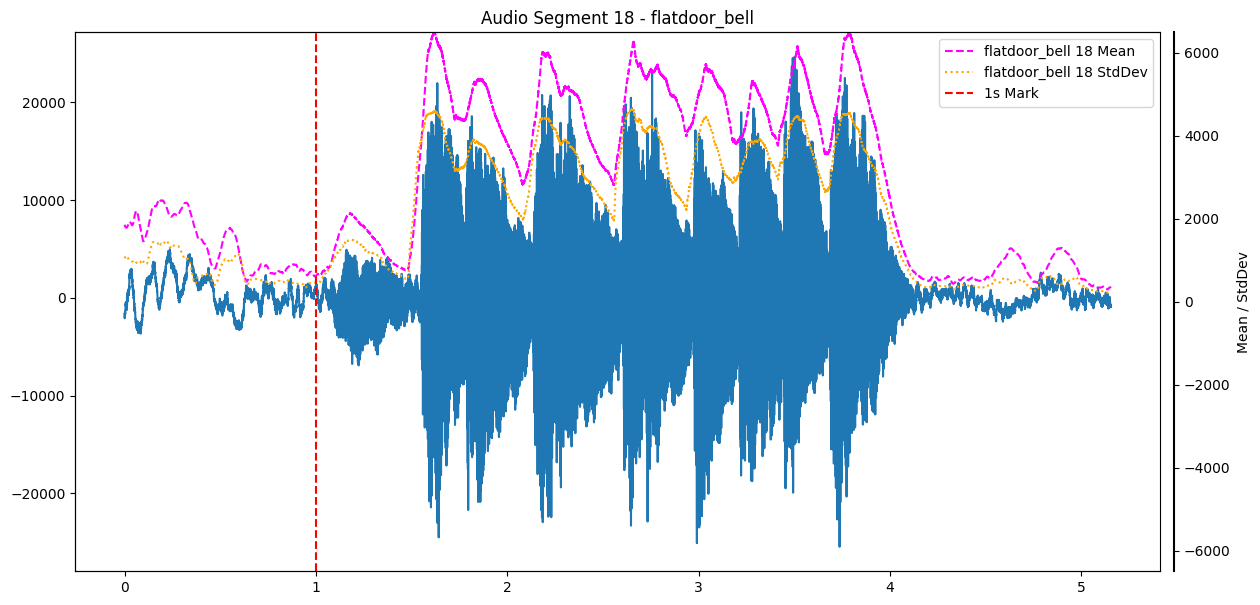

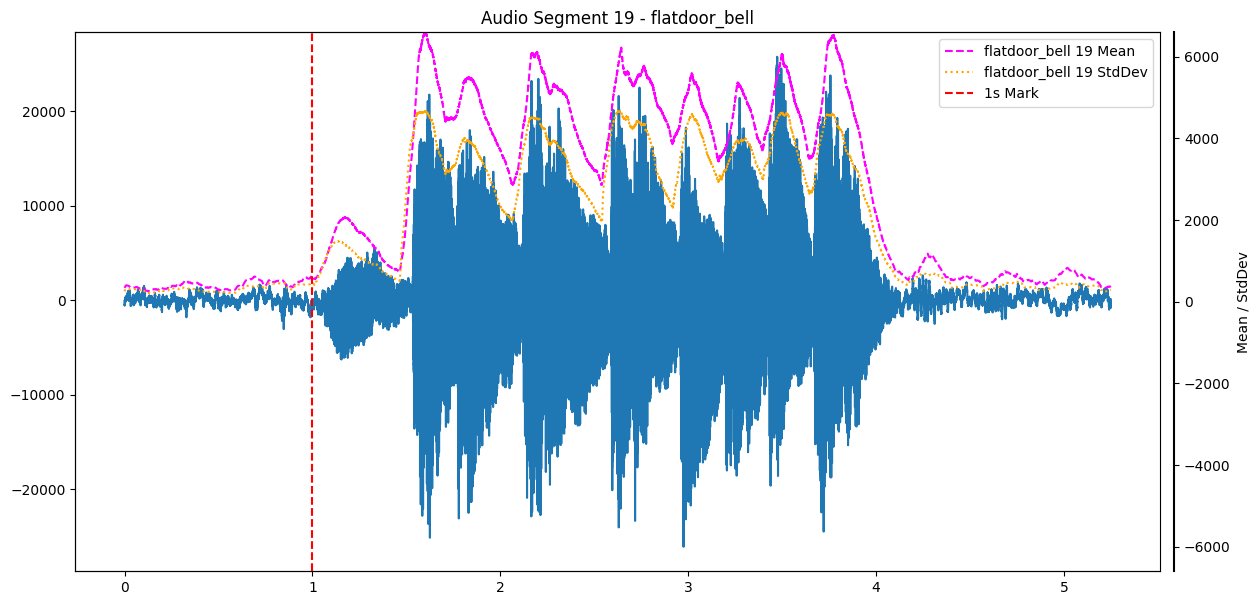

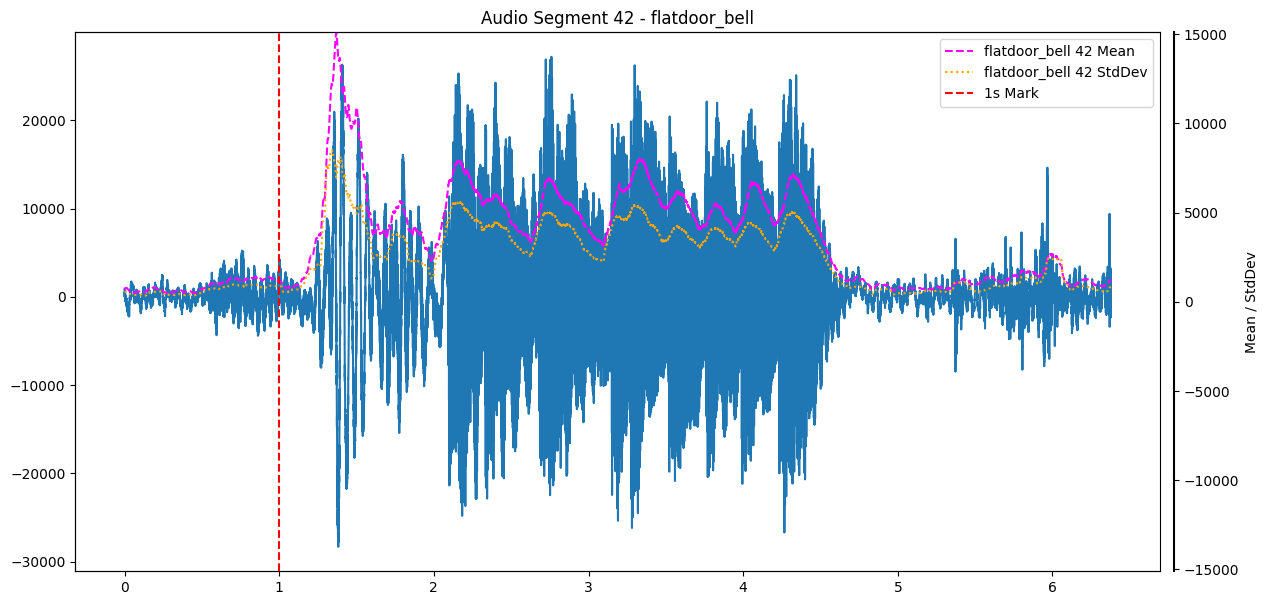

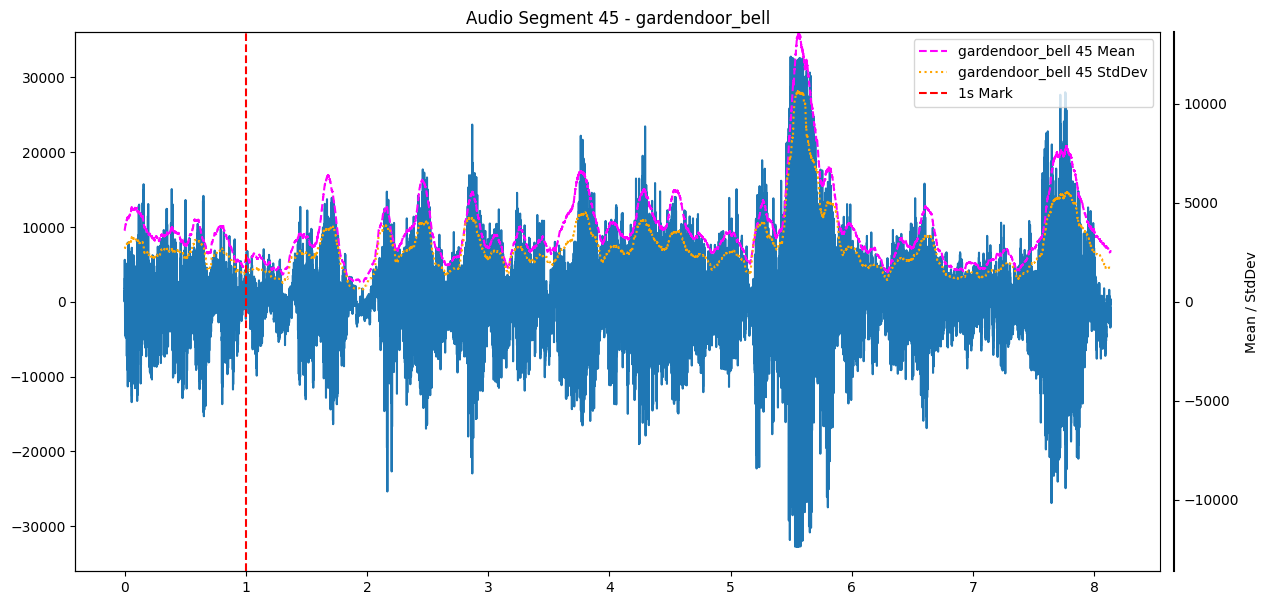

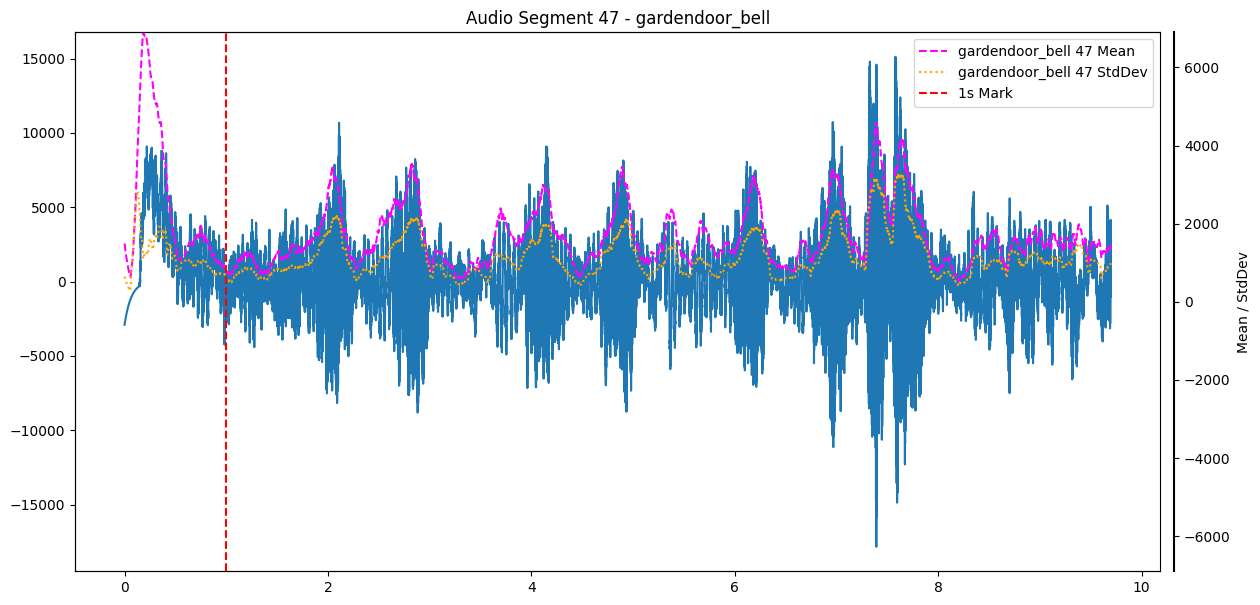

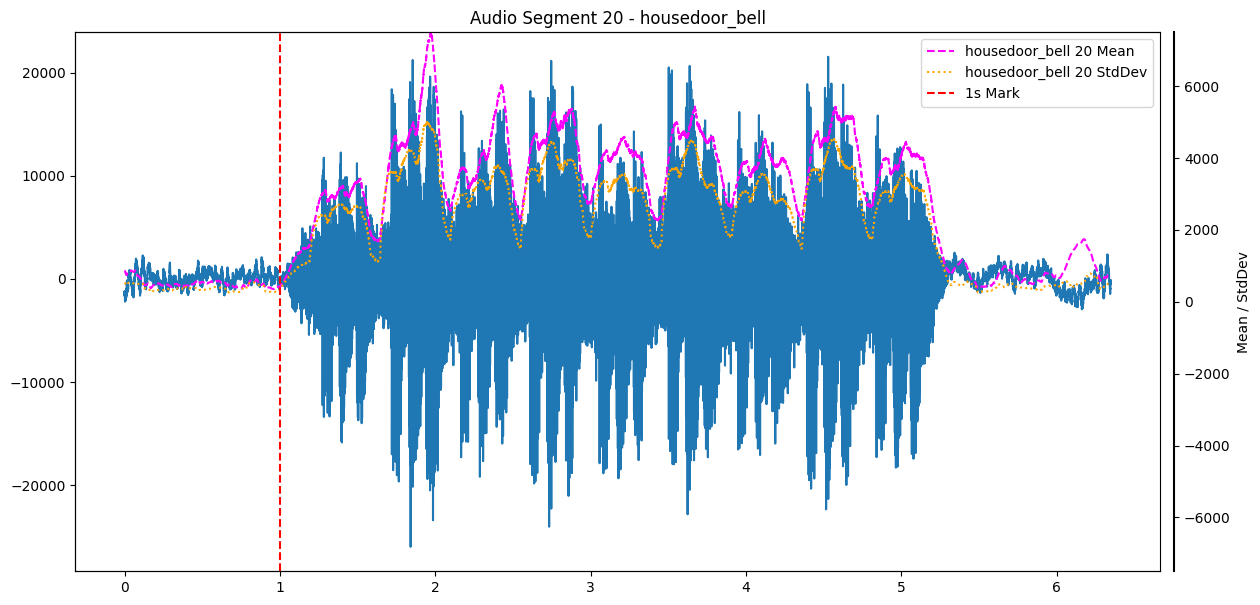

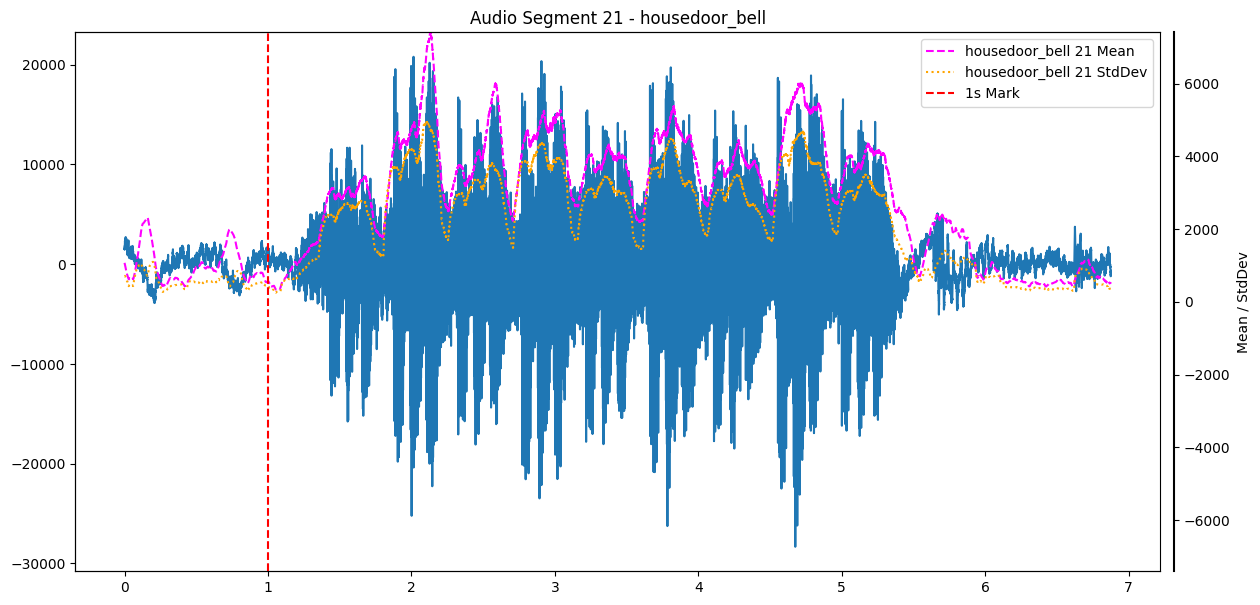

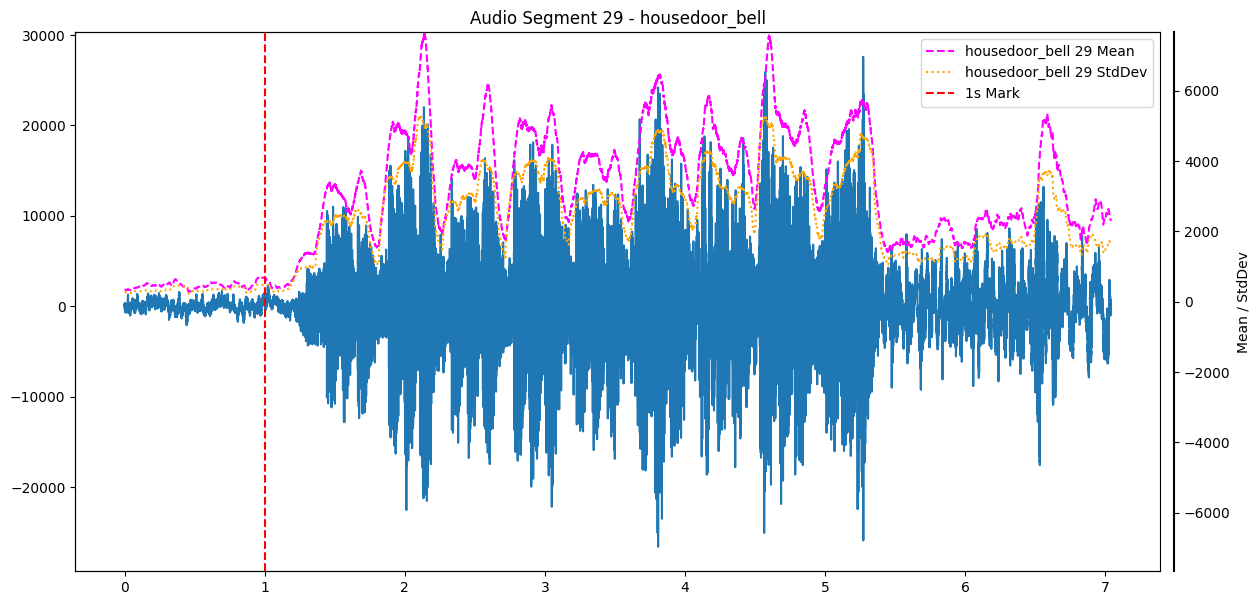

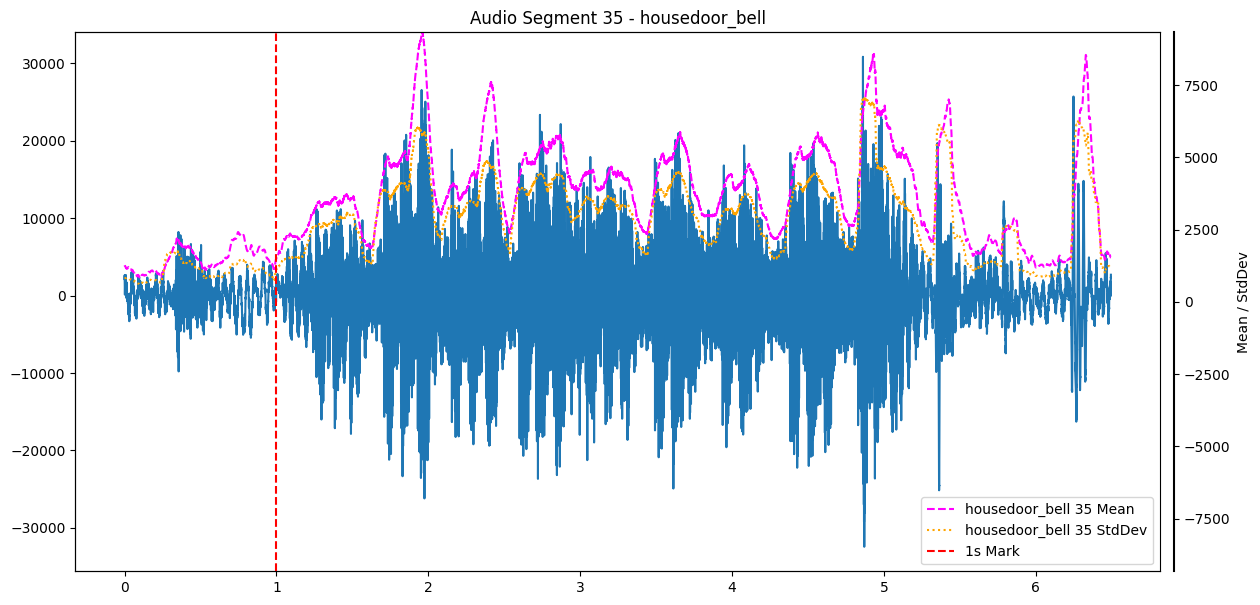

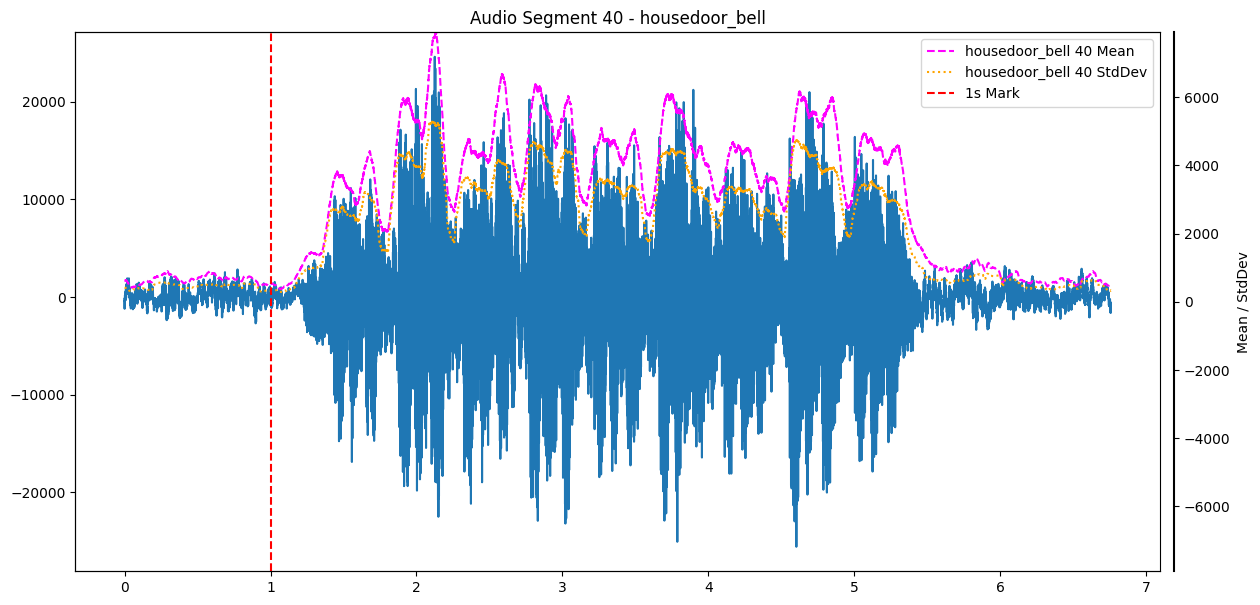

In [34]:
import plotly.graph_objects as go

# Add mean with sliding window of 100ms

import matplotlib.pyplot as plt
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


for index, row in filtered_annotations.iterrows():
    duration = row['duration'] + 2  # +2 to account for the 1s padding on both sides
    sample_rate = len(row['audio']) / duration
    time_axis = np.linspace(0, duration, len(row['audio']))
    
    window_size = int(0.1 * sample_rate)  # 100ms window size
    
    # Calculate the mean with sliding window
    audio_array = np.array(row['audio'])
    mean_audio = np.convolve(np.abs(audio_array), np.ones(window_size)/window_size, mode='valid')
    mean_time_axis = np.linspace(0, duration, len(mean_audio))
    
    # Calculate the standard deviation with sliding window
    squared_audio = np.square(np.int64(audio_array))
    mean_squared_audio = np.convolve(squared_audio, np.ones(window_size)/window_size, mode='valid')
    stddev_audio = np.sqrt(mean_squared_audio - np.square(mean_audio))
    
    # # Calculate SNR with sliding window
    # snr_window_start_idxs = np.arange(window_size, len(row['audio']) - window_size)
    # snr_window_end_idxs = np.arange(2 * window_size, len(row['audio']))
    # snr_audio_windowed = np.zeros(len(snr_window_end_idxs))
    # for i in range(len(snr_window_start_idxs)):
    #     snr_window_start = snr_window_start_idxs[i]
    #     snr_window_end = snr_window_end_idxs[i]
    #     snr = signaltonoise(audio_array[snr_window_start:snr_window_end])
    #     snr_audio_windowed[i] = snr
    
    # Create a new figure for each audio segment
    plt.figure(figsize=(14, 7))
    
    # Plot the original audio waveform
    plt.plot(time_axis, audio_array, label=f"{row['label']} {index}")
    
    # Plot the mean audio waveform
    # Create a twin y-axis to plot Mean and StdDev
    ax2 = plt.gca().twinx()
    
    # Plot the mean audio waveform
    ax2.plot(mean_time_axis, mean_audio, label=f"{row['label']} {index} Mean", linestyle='--', color='magenta')
    
    # Plot the standard deviation audio waveform
    ax2.plot(mean_time_axis, stddev_audio, label=f"{row['label']} {index} StdDev", linestyle=':', color='orange')
    
    # Move the axis to the right and scale it properly
    ax2.spines['right'].set_position(('outward', 10))
    ax2.spines['right'].set_linewidth(1.5)
    ax2.spines['right'].set_color('black')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.tick_params(axis='y', colors='black')
    ax2.yaxis.label.set_color('black')
    ax2.set_ylabel('Mean / StdDev')
    ax2.set_ylim(-mean_audio.max(), mean_audio.max())
    

    # Create a twin y-axis to plot SNR
    # ax2 = plt.gca().twinx()
    # ax2.plot(snr_window_start_idxs / sample_rate, snr_audio_windowed, label=f"{row['label']} {index} SNR", linestyle='-.', color='blue')
    
    # # Move the axis to the right and scale it properly
    # ax2.spines['right'].set_position(('outward', 10))
    # ax2.spines['right'].set_linewidth(1.5)
    # ax2.spines['right'].set_color('blue')
    # ax2.yaxis.set_label_position("right")
    # ax2.yaxis.tick_right()
    # ax2.tick_params(axis='y', colors='blue')
    # ax2.yaxis.label.set_color('blue')
    # ax2.set_ylabel('SNR')
    
    # Add a vertical line at 1s
    plt.axvline(x=1, color='red', linestyle='--', label='1s Mark')
    
    # Update layout
    plt.title(f'Audio Segment {index} - {row["label"]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mean / StdDev')
    plt.legend()
    
    # Show the figure
    plt.show()
